In [3]:
# Install docx2txt
!pip install docx2txt

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt


In [4]:
# Import docx2txt
import docx2txt
import collections
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [5]:
# Import os to change directories to the working directory
import os

In [6]:
# Get directory
os.getcwd()

'/resources/labs/Resume Compare'

In [7]:
# Change directory
os.chdir("/resources/labs/Resume Compare")

In [8]:
# Import posting and process
posting = docx2txt.process("CherryPoint_NAVAIR_FRC.docx")

In [ ]:
# Print for test
print(posting)

In [23]:
# Import resume for comparison
resume = docx2txt.process("Jeff Camacho_Resume_9Jun20.docx")
resumeNAVAIR = docx2txt.process("Jeff Camacho_Resume_9Jun20_NAVAIR_FRC.docx")

In [20]:
# Ooops
print("resume")

resume


In [ ]:
# Print for test
print(resume)

In [10]:
# Create a list 
text = [resume, posting]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
print("\nSimilarity Scores:")
print(cosine_similarity(count_matrix))


Similarity Scores:
[[1.         0.69543233]
 [0.69543233 1.        ]]


In [13]:
matchPercentage = cosine_similarity(count_matrix)[0][1] *100
matchPercentage = round(matchPercentage, 2)

In [14]:
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Your resume matches about 69.54% of the job description.


In [24]:
# Create a list 
text2 = [resumeNAVAIR, posting]

In [25]:
cv = CountVectorizer()
count_matrix2 = cv.fit_transform(text2)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
print("\nSimilarity Scores:")
print(cosine_similarity(count_matrix2))


Similarity Scores:
[[1.         0.69545019]
 [0.69545019 1.        ]]


In [27]:
matchPercentage = cosine_similarity(count_matrix2)[0][1] *100
matchPercentage = round(matchPercentage, 2)

In [28]:
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Your resume matches about 69.55% of the job description.


In [15]:
import pandas as pd

How many most common words to print:  20



OK. The 20 most common words are as follows

engineering :  30
technical :  23
equipment :  18
support :  16
design :  15
aircraft :  10
software :  10
data :  9
systems :  7
maintenance :  6
etc :  6
activities :  6
repair :  6
rework :  6
contacts :  6
position :  5
fleet :  5
avionics :  5
prepare :  5
review :  5


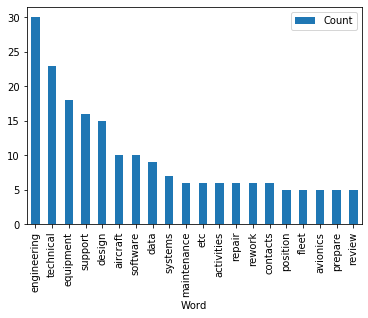

In [38]:
# Read input file, note the encoding is specified here 

a= posting

# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['assigned','provide','incumbent','related','factor','include','changes','cited']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

How many most common words to print:  20



OK. The 20 most common words are as follows

management :  17
engineering :  14
learning :  11
design :  9
project :  9
maintenance :  9
data :  9
skills :  8
google :  8
systems :  8
technical :  8
duties :  7
analysis :  7
equipment :  7
research :  7
support :  7
devsecops :  7
service :  6
austin :  6
utilized :  6


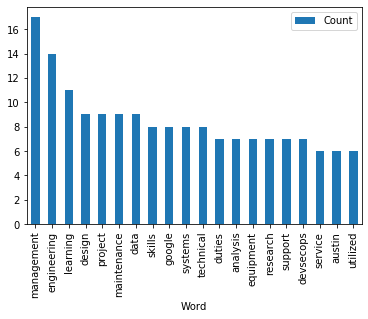

In [40]:
# Read input file, note the encoding is specified here 

a= resumeNAVAIR

# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['assigned','provide','incumbent','related','factor','include','changes','cited','–','2020','apr','ibm','linkedin','tx','-']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
# Sample data for analysis
data1 = resume
data2 = posting
 
df1 = pd.DataFrame({'Resume': [data1], 'Posting': [data2]})
 
# Initialize
vectorizer = TfidfVectorizer()
doc_vec = vectorizer.fit_transform(df1.iloc[0])
 
# Create dataFrame
df2 = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())
 
# Change column headers
df2.columns = df1.columns
print(df2)

                    Resume   Posting
000               0.039143  0.000000
01                0.013048  0.000000
0203              0.013048  0.000000
0216              0.013048  0.000000
0751              0.013048  0.000000
10                0.018567  0.005593
100               0.013048  0.000000
1020              0.026095  0.000000
12                0.013048  0.000000
12100             0.013048  0.000000
13                0.013048  0.000000
130f              0.000000  0.007861
130j              0.000000  0.007861
130r              0.000000  0.007861
130t              0.000000  0.007861
15                0.026095  0.000000
1526              0.013048  0.000000
16                0.013048  0.000000
17                0.039143  0.000000
19                0.039143  0.000000
1999              0.013048  0.000000
1n                0.000000  0.015723
1w                0.000000  0.007861
1y                0.000000  0.007861
1z                0.000000  0.007861
20                0.013048  0.000000
2

In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.
